-Trình bày việc lựa chọn đặc trưng, làm sạch và chuẩn hóa dữ liệu, giảm chiều, 

-Trực quan hoá kết quả của các quá trình trên. 

Lựa chọn đặc trưng

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer
import csv
import codecs
import io
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Shrubs_cleaned.csv', index_col=0)

# Select features
features = ['Hardiness(Min)','Hardiness(Max)','Climate Zones','Plant Family','Season of Interest','Min-Height(feet)','Max-Height(feet)', 'Min-Height(cm)', 'Max-Height(cm)', 'Characteristics', 'Soil Type']

label = 'Plant Type'

new_plant = {'Hardiness(Min)':6,
               'Hardiness(Max)':9,
              'Climate Zones': '17', 
              'Plant Family': 'abelia',
              'Season of Interest': 'summer (mid,late)', 
              'Min-Height(feet)': 3,
              'Max-Height(feet)': 5,
              'Min-Height(cm)': 90,
              'Max-Height(cm)': 150,
              'Characteristics': 'fragrant, showy, semi-evergreen', 
              'Soil Type': 'chalk, loam, sand'}

print(new_plant)
for feature in features:
  if feature in new_plant.keys():
    # print(df[feature])
    # print("---------")
    # print(new_plant[feature])
    new_plant[feature] = pd.factorize(df[feature])[0][df[feature] == new_plant[feature]][0]
# print("new plant: ")
# print(new_plant)

  # Convert categorical features to numerical
for feature in features:
  df[feature] = pd.factorize(df[feature])[0]
  # df[label] = pd.factorize(df[label])[0]

df.to_csv("Shrubs1.csv", index=False)

  # print(X.columns)

label_encoder1 = LabelEncoder() 
X = df[features]
  #X = label_encoder.fit_transform(df[features])
y = label_encoder1.fit_transform(df[label])

  #y = df[label]
plant_type_map = dict(zip(label_encoder1.transform(label_encoder1.classes_), label_encoder1.classes_))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Xây dựng mô hình Random Forest và huấn luyện trên tập huấn luyện
lr = RandomForestRegressor()
lr.fit(X_train, y_train)

  # Đánh giá mô hình trên tập kiểm tra
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print("MSE:", mse)
# print("R-squared:", r2)

new_plant_encoded = pd.get_dummies(pd.DataFrame(new_plant, index=[0]))[X.columns]
predicted_plant_type = lr.predict(new_plant_encoded)[0]
predicted_plant_type = int(predicted_plant_type)
# print("Loại cây (số nguyên):", predicted_plant_type)

  # Chuyển đổi kết quả sang giá trị ban đầu
predicted_plant_type_name = plant_type_map[predicted_plant_type]
print("Loại cây (tên):", predicted_plant_type_name)






{'Hardiness(Min)': 6, 'Hardiness(Max)': 9, 'Climate Zones': '17', 'Plant Family': 'abelia', 'Season of Interest': 'summer (mid,late)', 'Min-Height(feet)': 3, 'Max-Height(feet)': 5, 'Min-Height(cm)': 90, 'Max-Height(cm)': 150, 'Characteristics': 'fragrant, showy, semi-evergreen', 'Soil Type': 'chalk, loam, sand'}
Loại cây (tên): herbs, perennials, shrubs


Trong thống kê học, sai số toàn phương trung bình, viết tắt MSE của một phép ước lượng là trung bình của bình phương các sai số, tức là sự khác biệt giữa các ước lượng và những gì được đánh giá. MSE là một hàm rủi ro, tương ứng với giá trị kỳ vọng của sự mất mát sai số bình phương hoặc mất mát bậc hai.

Trong thống kê, hệ số xác định, được ký hiệu là R² hoặc r² và được phát âm là "R bình phương", là tỷ lệ của sự thay đổi trong biến phụ thuộc có thể dự đoán được từ biến độc lập.(R-squared)

Làm sạch dữ liệu

In [ ]:
#Loại bỏ các dòng trống hoặc các giá trị rỗng trong các cột.
import pandas as pd
# làm sạch dữ liệu
df=pd.read_csv('Shrubs.csv')
df = df.dropna()
#Chuyển đổi các giá trị chuỗi thành kiểu dữ liệu phù hợp, ví dụ: các giá trị kiểu số được chuyển đổi sang kiểu dữ liệu số.
# đơn vị feet
def my_lambda(x):
    x=str(x)
    
    if x.find('m')==-1:
        return pd.Series(float(x))
    else:
        x=x.strip().replace("m","")
        return pd.Series(float(x)*100)
    

df[['Min-Height(feet)','Max-Height(feet)']] = df['Height'].apply(lambda x: pd.Series(str(x).split("(")[0].split("–")))
df['Min-Height(feet)']=df['Min-Height(feet)'].apply(lambda x: pd.Series(str(x).strip().replace("'",'')))
df['Max-Height(feet)']=df['Max-Height(feet)'].apply(lambda x: pd.Series(str(x).strip().replace("'",'')))
df['Min-Height(feet)']=df['Min-Height(feet)'].apply(lambda x: pd.Series(str(x).strip().replace('"','')))
df['Max-Height(feet)']=df['Max-Height(feet)'].apply(lambda x: pd.Series(str(x).strip().replace('"','')))


df[['Min-Height(cm)','Max-Height(cm)']]= df['Height'].apply(lambda x: pd.Series(str(x).split("(")[1].split("–")))
df['Min-Height(cm)']=df['Min-Height(cm)'].apply(lambda x: pd.Series(str(x).strip().replace("cm",'')))
df['Max-Height(cm)']=df['Max-Height(cm)'].apply(lambda x: pd.Series(str(x).strip().replace("cm",'')))
df['Max-Height(cm)']=df['Max-Height(cm)'].apply(lambda x: pd.Series(str(x).strip().replace(")",'')))
df['Min-Height(cm)']=df['Min-Height(cm)'].apply(lambda x: pd.Series(str(x).strip().replace(")",'')))
df['Min-Height(cm)']=df['Min-Height(cm)'].apply(my_lambda)
df['Max-Height(cm)']=df['Max-Height(cm)'].apply(my_lambda)

df[['Min-Spread(feet)','Max-Spread(feet)']] = df['Spread'].apply(lambda x: pd.Series(str(x).split("(")[0].split("–")))
df['Min-Spread(feet)']=df['Min-Spread(feet)'].apply(lambda x: pd.Series(str(x).strip().replace("'",'')))
df['Max-Spread(feet)']=df['Max-Spread(feet)'].apply(lambda x: pd.Series(str(x).strip().replace("'",'')))
df['Min-Spread(feet)']=df['Min-Spread(feet)'].apply(lambda x: pd.Series(str(x).strip().replace('"','')))


df[['Min-Spread(cm)','Max-Spread(cm)']]= df['Spread'].apply(lambda x: pd.Series(str(x).split("(")[1].split("–")))
df['Min-Spread(cm)']=df['Min-Spread(cm)'].apply(lambda x: pd.Series(str(x).strip().replace("cm",'')))
df['Max-Spread(cm)']=df['Max-Spread(cm)'].apply(lambda x: pd.Series(str(x).strip().replace("cm",'')))
df['Max-Spread(cm)']=df['Max-Spread(cm)'].apply(lambda x: pd.Series(str(x).strip().replace(")",'')))
df['Min-Spread(cm)']=df['Min-Spread(cm)'].apply(lambda x: pd.Series(str(x).strip().replace(")",'')))
df['Min-Spread(cm)']=df['Min-Spread(cm)'].apply(my_lambda)
df['Max-Spread(cm)']=df['Max-Spread(cm)'].apply(my_lambda)
df[['Hardiness(Min)','Hardiness(Max)']]= df['Hardiness'].apply(lambda x: pd.Series(str(x).split("–")))


df['Soil pH'] = pd.to_numeric(df['Soil pH'], errors='coerce')

#Loại bỏ các khoảng trắng không cần thiết.
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#Loại bỏ các ký tự đặc biệt và chuyển đổi các giá trị sang chữ thường để dễ dàng sử dụng và tìm kiếm.
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df['Name'] = df['Name'].str.replace('[^a-zA-Z0-9 \n\.]', '')
#Sau khi làm sạch dữ liệu, chúng ta có thể lưu lại dữ liệu đã làm sạch vào một file mới bằng cách sử dụng phương thức to_csv() của pandas.
df.to_csv('Shrubs_cleaned.csv', encoding='utf-8-sig', index=False)

<ipython-input-2-a698899aff0b>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace('[^a-zA-Z0-9 \n\.]', '')


Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# chuẩn hóa dữ liệu
# Tạo một instance của MinMaxScaler
df=pd.read_csv('Shrubs.csv')
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu cho feature "Height"
df['Height'],u=pd.factorize(df['Height'])
height = df[['Height']]
height_scaled = scaler.fit_transform(height)

# Gán lại giá trị đã chuẩn hóa cho feature "Height" vào trong dfset
df['Height'] = height_scaled
print(height_scaled)

[[0.        ]
 [0.00645161]
 [0.00645161]
 ...
 [0.00645161]
 [0.12903226]
 [0.12903226]]


Giảm chiều dữ liệu

(1485, 2)


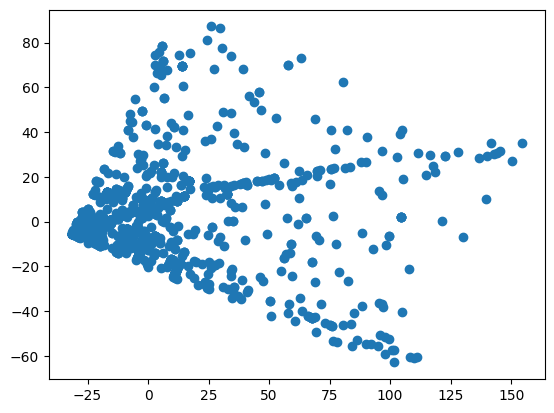

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Giamr chiều dữ liệu
# Đọc dữ liệu từ file csv
df = pd.read_csv('Shrubs.csv')

# Chọn các cột chứa dữ liệu cần giảm chiều
cols = ['Height', 'Spread', 'Water Needs', 'Soil pH', 'Soil Drainage']
for col in cols:
    df[col] =pd.factorize(df[col])[0]
# Tạo một instance của PCA với số chiều mới là 2
pca = PCA(n_components=2)

# Áp dụng PCA cho dfset
dfset_reduced = pca.fit_transform(df[cols])

# In ra kích thước của dfset sau khi giảm chiều
print(dfset_reduced.shape)

# Vẽ biểu đồ scatter plot của dfset giảm chiều với 2 trục mới
plt.scatter(dfset_reduced[:, 0], dfset_reduced[:, 1])
plt.show()

Cải thiện độ chính xác của mô hình 

Đẩy nhanh tốc độ đào tạo mô hình
 
Mô hình trở nên đơn giản hơn

Về mặt ý tưởng, thuật toán PCA tìm một hệ không gian mới và tối đa hóa phương sai dữ liệu của không gian mới đó. Sau đó lựa chọn ra n chiều có phương sai lớn nhất (giả thuyết rằng dữ liệu càng phân tán, phương sai càng lớn thì càng có giá trị)

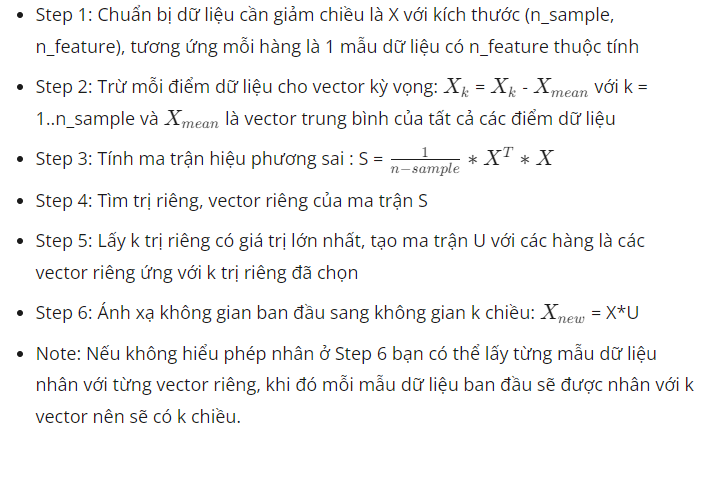

In [ ]:
# Giảm chiều dữ liệu
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df = pd.read_csv('Shrubs.csv')


cols = ['Height', 'Spread', 'Water Needs', 'Soil pH', 'Soil Drainage']
for col in cols:
    df[col] =pd.factorize(df[col])[0]
#Áp đặt các giá trị bị thiếu với giá trị trung bình
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[cols])
#thuật toán giảm chiều PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

print("Dữ liệu gốc:\n", df[cols])
print("Dữ liệu sau khi gán giá trị còn thiếu:\n", X_imputed)
print("Dữ liệu sau khi giảm chiều:\n", X_pca)

Dữ liệu gốc:
       Height  Spread  Water Needs  Soil pH  Soil Drainage
0          0       0            0        0              0
1          1       1            0        0              0
2          1       2            0        0              0
3          1       2            0        0              0
4          2       3            0        0              0
...      ...     ...          ...      ...            ...
1480      46       1            0        0              0
1481      46       1            0        4              0
1482       1       6            0        4              0
1483      20      11            0        4              0
1484      20      11            0        4              0

[1485 rows x 5 columns]
Dữ liệu sau khi gán giá trị còn thiếu:
 [[ 0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.]
 ...
 [ 1.  6.  0.  4.  0.]
 [20. 11.  0.  4.  0.]
 [20. 11.  0.  4.  0.]]
Dữ liệu sau khi giảm chiều:
 [[-31.61753607  -5.6559948 ]
 [-30.30352817  -5.1331

Chọn các mô hình phù hợp (ít nhất 2 mô hình/thuật toán).- Chia dữ liệu thành Train/Validation/Test set theo tỉ lệ phù hợp.
- Trình bày các đồ thị thể hiện hiệu quả của các mô hình trong quá trình huấn luyện/Hiệu chỉnh/Kiểm thử.
- So sánh hiệu quả của các mô hình bằng bảng dữ liệu hoặc đồ thị.

Chọn các mô hình phù hợp (ít nhất 2 mô hình/thuật toán).- Chia dữ liệu thành Train/Validation/Test set theo tỉ lệ phù hợp.
- Chọn 2 mô hình random forest và naive bayes

Naive bayes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file csv
df = pd.read_csv('Shrubs.csv')

# Chọn các feature để huấn luyện mô hình
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Chọn target để huấn luyện mô hình
target = 'Plant Type'
df[target]=pd.factorize(df[target])[0]
# Tách dữ liệu thành 3 tập: train, validation và test
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Tạo và huấn luyện mô hình random forest
rf_model = GaussianNB()
rf_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập validation
val_score = rf_model.score(X_val, y_val)
print('Validation score:', val_score)

# Đánh giá mô hình trên tập test
test_score = rf_model.score(X_test, y_test)
print('Test score:', test_score)

Validation score: 0.9696969696969697
Test score: 0.9595959595959596


Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Đọc dữ liệu từ file csv
df = pd.read_csv('Shrubs.csv')

# Chọn các feature để huấn luyện mô hình
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']
df_encoded = pd.get_dummies(df[features], drop_first=True)


# Chọn target để huấn luyện mô hình
target = 'Plant Type'
df[target]=pd.factorize(df[target])[0]
# Tách dữ liệu thành 3 tập: train, validation và test
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# Tạo và huấn luyện mô hình random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập validation
val_score = rf_model.score(X_val, y_val)
print('Validation score:', val_score)

# Đánh giá mô hình trên tập test
test_score = rf_model.score(X_test, y_test)
print('Test score:', test_score)

Validation score: 0.9865319865319865
Test score: 0.9764309764309764


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('Shrubs.csv')
# Chọn các feature để huấn luyện mô hình
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']
for feature in features:
    df[feature] = pd.factorize(df[feature])[0]

# Chọn target để huấn luyện mô hình
target = 'Plant Type'
df[target]=pd.factorize(df[target])[0]

# Split data into Train/Validation/Test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate KNN model on Validation set
y_pred_val = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation accuracy: {val_accuracy:.2f}')

# Evaluate KNN model on Test set
y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test accuracy: {test_accuracy:.2f}')

Validation accuracy: 0.77
Test accuracy: 0.73


Có một số nguyên nhân khiến mô hình KNN trong đoạn mã trên có thể có độ chính xác thấp:

Tiền xử lý dữ liệu: Trong đoạn mã, các đặc trưng được chọn để huấn luyện mô hình được chuyển đổi thành các giá trị số bằng hàm pd.factorize. Tuy nhiên, cách chuyển đổi này có thể gây mất mát thông tin hoặc không phù hợp cho mô hình KNN. Việc chọn và tiền xử lý đặc trưng có ảnh hưởng lớn đến hiệu suất của mô hình.

Chọn số láng giềng (k): Trong đoạn mã, số láng giềng được chọn là 3 (k = 3). Việc chọn sai số láng giềng có thể ảnh hưởng đến hiệu suất của mô hình. Nếu giá trị k quá nhỏ, mô hình có thể bị overfitting. Nếu giá trị k quá lớn, mô hình có thể bị underfitting. Điều này có thể làm giảm độ chính xác của mô hình.

Không tinh chỉnh siêu tham số: Trong đoạn mã, không có bất kỳ tinh chỉnh siêu tham số nào được thực hiện trên mô hình KNN. Việc tinh chỉnh siêu tham số như khoảng cách đo lường, trọng số láng giềng và nhiều hơn nữa có thể cải thiện độ chính xác của mô hình.

Không xử lý mất cân bằng lớp: Nếu dữ liệu mất cân bằng giữa các lớp, mô hình KNN có thể có xu hướng dự đoán lớp thiểu số và có độ chính xác thấp trên lớp đa số. Cần xem xét các phương pháp xử lý mất cân bằng lớp như tái cân bằng lớp hoặc xử lý mất cân bằng trong quá trình huấn luyện.

Để cải thiện độ chính xác của mô hình KNN, bạn có thể thử các biện pháp sau:

Tiền xử lý dữ liệu một cách cẩn thận để đảm bảo giữ lại các thông tin quan trọng và phù hợp cho mô hình KNN.
Thử nghiệm và tinh chỉnh các giá trị siêu tham số khác nhau của mô hình KNN, bao gồm số láng giềng k và các phương pháp đo lường khoảng cách khác nhau.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('Shrubs.csv')

# Chọn các feature để huấn luyện mô hình
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']

# Tiền xử lý dữ liệu
df_encoded = pd.get_dummies(df[features], drop_first=True)
target = df['Plant Type']

# Chia thành tập huấn luyện, tập kiểm tra và tập validation
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tìm số láng giềng tối ưu
best_k = None
best_accuracy = 0.0

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Huấn luyện mô hình với số láng giềng tối ưu trên tập huấn luyện + tập validation
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Đánh giá mô hình trên tập kiểm tra
y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Best k: {best_k}')
print(f'Test accuracy: {test_accuracy:.2f}')

Best k: 9
Test accuracy: 0.92


Các thay đổi chính bao gồm:

Sử dụng pd.get_dummies để chuyển đổi các biến hạng mục thành các biến giả tưởng (dummy variables). Điều này giúp giữ lại thông tin quan trọng từ các biến hạng mục và hạn chế sự mất mát thông tin so với pd.factorize.

Sử dụng vòng lặp để tìm số láng giềng tối ưu. Vòng lặp này lặp qua các giá trị k từ 1 đến 10 (có thể điều chỉnh phạm vi này) và đánh giá độ chính xác trên tập kiểm tra. Số láng giềng tương ứng với độ chính xác cao nhất được lựa chọn làm số láng giềng tối ưu.

Huấn luyện mô hình KNN với số láng giềng tối ưu và đánh giá độ chính xác trên tập kiểm tra.

- Trình bày các đồ thị thể hiện hiệu quả của các mô hình trong quá trình huấn luyện/Hiệu chỉnh/Kiểm thử.
- So sánh hiệu quả của các mô hình bằng bảng dữ liệu hoặc đồ thị.

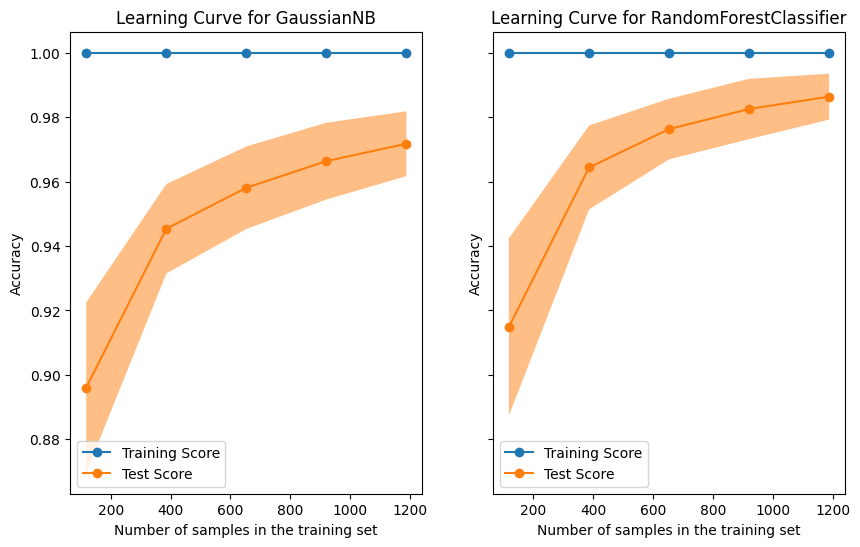

In [ ]:
#%%
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve

naive_bayes = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

df = pd.read_csv('Shrubs.csv', index_col=0)

# Select features
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']
label = 'Plant Type'

# Convert categorical features to numerical
df_encoded = pd.get_dummies(df[features], drop_first=True)
df[label] = pd.factorize(df[label])[0]
    
X = df_encoded
y = df[label]
common_params = {
    "X": X,
    "y": y,
    "train_sizes":   np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=100, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}


for ax_idx, estimator in enumerate([naive_bayes, rf ]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
    
fig.show()

# %%


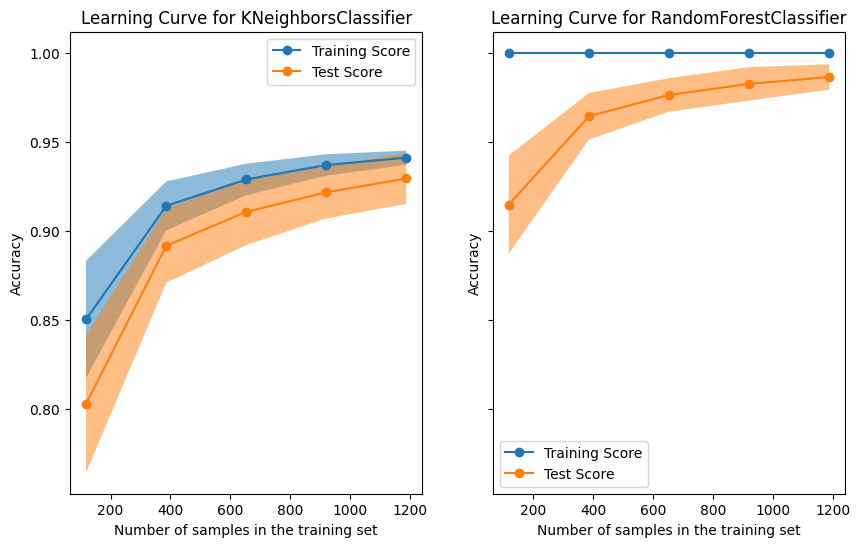

In [ ]:
#%%
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve

knn = KNeighborsClassifier(n_neighbors=9)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

df = pd.read_csv('Shrubs.csv', index_col=0)

# Select features
features = ['Hardiness', 'Climate Zones', 'Plant Type', 'Exposure', 'Season of Interest', 
            'Height', 'Spread', 'Water Needs', 'Soil Type', 'Soil pH', 'Soil Drainage']
label = 'Plant Type'

# Convert categorical features to numerical
df_encoded = pd.get_dummies(df[features], drop_first=True)
df[label] = pd.factorize(df[label])[0]
    
X = df_encoded
y = df[label]
common_params = {
    "X": X,
    "y": y,
    "train_sizes":   np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=100, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}


for ax_idx, estimator in enumerate([knn, rf ]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
    
fig.show()

# %%


LÀM MÔ HÌNH CNN


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
# Load data from csv file



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [ ]:
!unzip Images.zip

Archive:  Images.zip
replace Images/Annuals/hoa1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Images/Annuals/hoa1.jpg  
  inflating: Images/Annuals/hoa10.jpg  
  inflating: Images/Annuals/hoa100.jpg  
  inflating: Images/Annuals/hoa101.jpg  
  inflating: Images/Annuals/hoa102.jpg  
  inflating: Images/Annuals/hoa103.jpg  
  inflating: Images/Annuals/hoa104.jpg  
  inflating: Images/Annuals/hoa105.jpg  
  inflating: Images/Annuals/hoa106.jpg  
  inflating: Images/Annuals/hoa107.jpg  
  inflating: Images/Annuals/hoa108.jpg  
  inflating: Images/Annuals/hoa109.jpg  
  inflating: Images/Annuals/hoa11.jpg  
  inflating: Images/Annuals/hoa110.jpg  
  inflating: Images/Annuals/hoa111.jpg  
  inflating: Images/Annuals/hoa112.jpg  
  inflating: Images/Annuals/hoa113.jpg  
  inflating: Images/Annuals/hoa114.jpg  
  inflating: Images/Annuals/hoa115.jpg  
  inflating: Images/Annuals/hoa116.jpg  
  inflating: Images/Annuals/hoa117.jpg  
  inflating: Images/Annuals/hoa118.jpg  
  inflat

In [ ]:
pts = os.listdir('Images')
pts

['Trees',
 'Ornamental Grasses',
 'Fruits',
 'Roses',
 'Orchids',
 'Shrubs',
 'Annuals',
 'Aquatic',
 'Bulbs',
 'Climbers',
 'Conifers']

In [ ]:
import tensorflow as tf
image_dataset_from_directory = tf.keras.utils.image_dataset_from_directory

Chuyển ảnh từ JPG sang JPEG

In [ ]:
import os
import cv2
for pth in os.listdir('Images'):
    path = os.path.join('Images', pth)
    for file in os.listdir(path):
        if file.endswith(".jpg") or file.endswith(".JPG"):
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            cv2.imwrite(img_path[0:-4]+".jpeg", img)
            os.remove(img_path)

In [ ]:
images_path='Images'
train_ds = image_dataset_from_directory(
    images_path,
    validation_split=0.2,
    subset='training',
    seed=0,
)
val_ds = image_dataset_from_directory(
    images_path,
    validation_split=0.2,
    subset='validation',
    seed=0,
)

Found 2588 files belonging to 11 classes.
Using 2071 files for training.
Found 2588 files belonging to 11 classes.
Using 517 files for validation.


In [ ]:
class_names = train_ds.class_names

Đoạn code trên sử dụng thư viện Matplotlib để trực quan hóa một mẫu 10 hình ảnh từ tập dữ liệu huấn luyện train_ds.

Dòng đầu tiên plt.figure(figsize=(10, 10)) tạo ra một hình ảnh trống với kích thước 10x10 inch để vẽ các hình ảnh và tiêu đề.

Vòng lặp lấy 10 hình ảnh và nhãn tương ứng từ train_ds. Sau đó, vòng lặp lặp lại 10 lần để trực quan hóa các hình ảnh và tiêu đề tương ứng.

Dòng ax = plt.subplot(4, 3, i + 1) tạo một subplot để vẽ hình ảnh và tiêu đề tương ứng. Ở đây, chúng ta đang tạo 4 hàng và 3 cột, với i tăng từ 0 đến 9, vì vậy chúng ta có thể hiển thị tối đa 12 hình ảnh trên mỗi trang.

Dòng tiếp theo plt.imshow(images[i].numpy().astype("uint8")) hiển thị hình ảnh thứ i. Các giá trị pixel được chuyển đổi thành số nguyên không dấu 8-bit để hiển thị.

Dòng plt.title(class_names[labels[i]]) thiết lập tiêu đề của hình ảnh tương ứng với tên của lớp.

Cuối cùng, dòng plt.axis("off") loại bỏ trục hình ảnh để giúp hình ảnh trông sạch hơn.

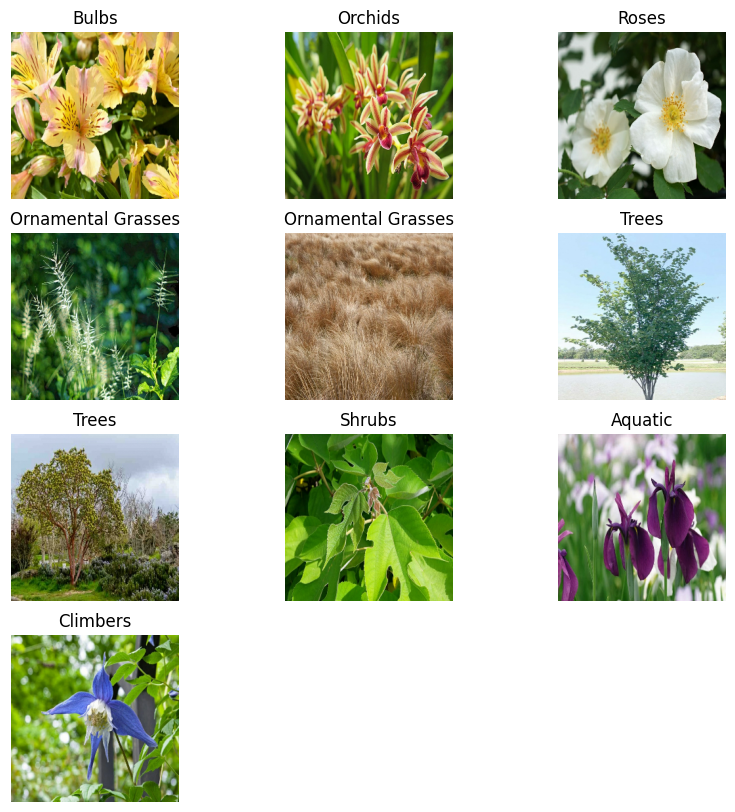

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
class_names = train_ds.class_names
len(class_names)

11

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Define the model
layers = tf.keras.layers
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

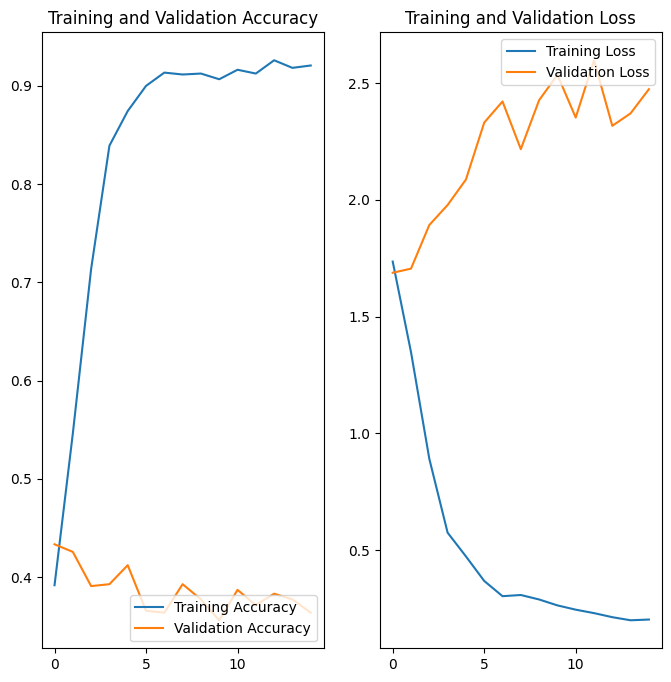

In [ ]:
num_classes = len(class_names)



model = Sequential([
    #5 lớp
  layers.Rescaling(1./255, input_shape=(256, 256, 3)), #thay đổi tỉ lệ giá trị pixel của ảnh đầu vào. Trong trường hợp này, nó chia mỗi giá trị pixel cho 255 để đưa chúng về khoảng từ 0 đến 1.Huấn luận dễ dàng hơn
  layers.Conv2D(16, 3, padding='same', activation='relu'), #lớp tích chập 2D, thực hiện các phép tích chập trên ảnh đầu vào
  layers.MaxPooling2D(), #Lớp này được sử dụng để giảm kích thước của đầu ra từ các lớp Conv2D trước đó bằng cách giữ lại giá trị lớn nhất trong mỗi vùng pooling. 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), # Lớp này được sử dụng để biến đổi đầu ra từ các lớp trước đó (ở dạng ma trận) thành một vector 1 chiều. Nó "làm phẳng" dữ liệu để chuẩn bị cho các lớp Fully Connected (Dense) sau này.
  layers.Dense(128, activation='relu'), #Lớp này là lớp Fully Connected (hoặc dense layer) với các đơn vị neuron kết nối đầy đủ với lớp trước. Trong trường hợp này, có hai lớp Dense. Lớp đầu tiên có 128 đơn vị và sử dụng hàm kích hoạt 'relu', trong khi lớp thứ hai không có hàm kích hoạt (được sử dụng để đưa ra đầu ra cuối cùng của mô hình)
  layers.Dense(num_classes)
])




model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


# Setup checkpoint

ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
filepath = ".drive/MyDrive/model.h5" # bổ sung dữ liệu
checkpoint = ModelCheckpoint(filepath, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]

# Load model:
if os.path.exists(filepath):
    model.load_weights(filepath)

# Train the model
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = callback_list
)# Evaluate the model on test set
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Overfitting (quá khớp): Mô hình của bạn đã học quá nhiều từ dữ liệu huấn luyện, đến mức nó đã học thuộc từng điểm dữ liệu. Do đó, khi mô hình được đánh giá trên tập dữ liệu kiểm tra, nó không thể tổng quát hóa được dữ liệu mà chưa được học trên tập huấn luyện, dẫn đến kết quả kiểm tra thấp hơn.

Tập huấn luyện và tập kiểm tra không đồng đều: Đôi khi tập dữ liệu kiểm tra và tập dữ liệu huấn luyện có phân bố khác nhau hoặc có tỷ lệ các lớp khác nhau, dẫn đến kết quả kiểm tra và huấn luyện không đồng đều.

Số lượng dữ liệu kiểm tra quá ít: Nếu bạn chỉ sử dụng một lượng dữ liệu kiểm tra nhỏ để đánh giá mô hình của mình, kết quả kiểm tra có thể không phản ánh được khả năng tổng quát hóa của mô hình trên toàn bộ tập dữ liệu.

Mô hình không được đánh giá đúng cách: Khi đánh giá mô hình, bạn cần chắc chắn rằng các thông số đánh giá đang được tính toán đúng cách và phù hợp với bài toán của bạn.

In [ ]:
!unzip Images.zip

chương trình sử dụng Data Augmentation để tăng cường dữ liệu huấn luyện. Cụ thể, nó sử dụng ImageDataGenerator của Keras để tạo ra các biến đổi khác nhau trên tập dữ liệu huấn luyện như xoay ảnh, thu phóng, dịch chuyển, cắt ảnh, lật ngang, lật dọc. Điều này giúp mô hình học tập được các biến thể khác nhau của hình ảnh, giảm thiểu overfitting và cải thiện độ chính xác của mô hình. Loss(độ mất mát)

Trong trường hợp này, quy trình tăng cường dữ liệu được xác định bằng cách sử dụng lớp ImageDataGenerator trong thư viện Keras/TensorFlow. Các tham số của ImageDataGenerator trong đoạn mã có ý nghĩa như sau:
rotation_range: Góc xoay ngẫu nhiên (đơn vị độ) cho các biến đổi xoay

zoom_range: Phạm vi thu phóng ngẫu nhiên cho các biến đổi thu phóng.

width_shift_range: Phạm vi dịch chuyển ngang ngẫu nhiên (theo tỷ lệ của chiều rộng ảnh gốc) cho các biến đổi dịch chuyển ngang.

height_shift_range: Phạm vi dịch chuyển dọc ngẫu nhiên (theo tỷ lệ của chiều cao ảnh gốc) cho các biến đổi dịch chuyển dọc.

shear_range: Phạm vi biến dạng cắt ngẫu nhiên cho các biến đổi cắt.

horizontal_flip: Lựa chọn xoay ngang ngẫu nhiên cho các biến đổi lật ngang

fill_mode: Chế độ điền giá trị cho các pixel mới được tạo ra trong quá trình tăng cường (thông qua các biến đổi xoay, dịch chuyển, cắt). "nearest" sử dụng giá trị gần nhất của pixel gốc để điền vào.

Quy trình tăng cường dữ liệu này sẽ được áp dụng trên tập huấn luyện để tạo ra các phiên bản mới của dữ liệu, mở rộng khả năng đại diện của mô hình và giảm thiểu hiện tượng overfitting.

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
130/130 [==============================] - 273s 2s/step - loss: 1.7850 - accuracy: 0.4092 - val_loss: 1.3345 - val_accuracy: 0.5299
Epoch 2/20
130/130 [==============================] - 304s 2s/step - loss: 1.3998 - accuracy: 0.5087 - val_loss: 1.2189 - val_accuracy: 0.5840
Epoch 3/20
130/130 [==============================] - 300s 2s/step - loss: 1.2575 - accuracy: 0.5638 - val_loss: 1.1789 - val_accuracy: 0.5985
Epoch 4/20
130/130 [==============================] - 270s 2s/step - loss: 1.1701 - accuracy: 0.5906 - val_loss: 1.0716 - val_accuracy: 0.6197
Epoch 5/20
130/130 [==============================] - 307s 2s/step - loss: 1.1235 - accuracy: 0.5976 - val_loss: 1.0508 - val_accuracy: 0.6255
Epoch 6/20
130/130 [==============================] - 306s 2s/step - loss: 1.0354 - accuracy: 0.6345 - val_loss: 0.9660 - val_accuracy: 0.6467
Epoch 7/20
130/130 [==============================] - 268s 2s/step - loss: 0.98

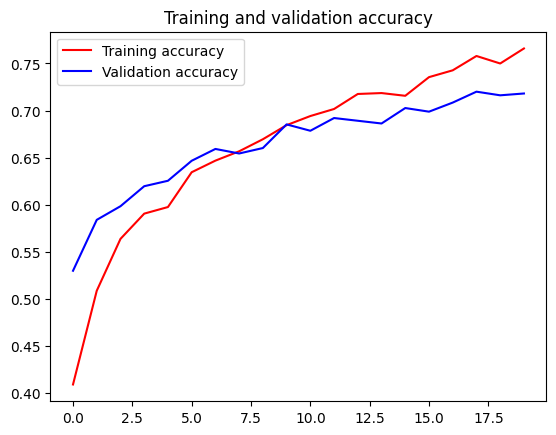

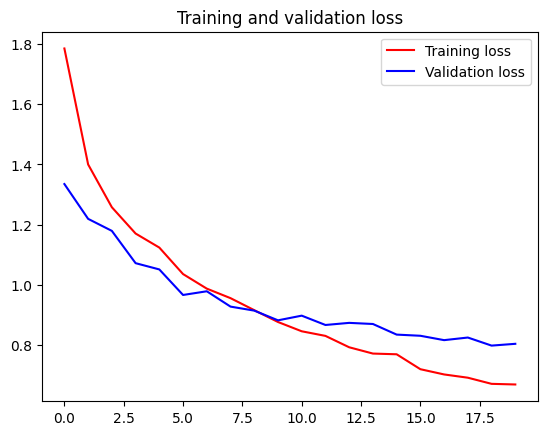

In [ ]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# trỏ tới thư mục ảnh
img_dir = 'Images/'

flower_names = ['Trees', 'Ornamental Grasses', 'Fruits', 'Roses', 'Orchids', 'Shrubs', 'Annuals', 'Aquatic', 'Bulbs', 'Climbers', 'Conifers']

images = []
labels = []

#đọc và load các ảnh hoa từ thư mục và lưu chúng vào danh sách 'images'.Trong mỗi vòng lặp,  sử dụng hàm 'os.path.join' để tạo đường dẫn tới thư mục chứa ảnh của hoa đang xét, 
#chuẩn hóa giá trị pixel về dải [0, 1]. 
#Cuối cùng, ảnh và tên hoa tương ứng được lưu vào các danh sách 'images' và 'labels'.
for flower_name in flower_names:
  
# Đặt thư mục cho hoa hiện tại
    flower_dir = os.path.join(img_dir, flower_name)
  # Lặp qua từng hình ảnh trong thư mục hoa
    for img_name in os.listdir(flower_dir):
      
# Đọc hình ảnh và chuyển đổi nó thành một mảng numpy array
        img_path = os.path.join(flower_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224)) # chuẩn hóa các giá trị thành 2244x224 pixel
        img = img.astype('float32') / 255.0 # Bình thường hóa các giá trị pixel
        images.append(img)
        labels.append(flower_name)
# chuyển  images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)


train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)


# Mã hóa nhãn dưới dạng số nguyên để mô hình mới hiểu được
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)


#tăng cường dữ liệu
train_datagen = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")




# tăng cường dữ liệu
test_datagen = ImageDataGenerator()

# Create the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#đóng băng các lớp
#Việc đóng băng các lớp này giúp giảm thiểu số lượng tham số trong mô hình và giúp tăng tốc độ huấn luyện, đặc biệt là khi sử dụng các mô hình có nhiều lớp. 
#Trong trường hợp này, mô hình sử dụng MobileNetV2 làm mô hình cơ sở, và đóng băng các lớp của nó có thể giúp giữ lại các trọng số học được trước đó từ tập dữ liệu imagenet và tránh việc mất đi thông tin học được từ các lớp này khi huấn luyện lại trên tập dữ liệu mới.
for layer in base_model.layers:
    layer.trainable = False



#Lớp base_model: Đây là một mô hình cơ sở (base model), mô hình mobilenetV2. Lớp này được sử dụng để trích xuất đặc trưng từ ảnh đầu vào.
#Lớp GlobalAveragePooling2D(): Lớp này thực hiện phép toàn tử "global average pooling" trên đầu ra của base_model. Nó tính trung bình các giá trị trong mỗi feature map của base_model, thu gọn đầu ra thành một vectơ có số chiều cố định.
#Lớp Dense(512, activation='relu'): Lớp fully connected (hoàn toàn kết nối) với 512 đơn vị đầu ra và hàm kích hoạt ReLU. Lớp này thực hiện một phép biến đổi phi tuyến tính trên đầu ra của lớp trước đó.
#Lớp Dropout(0.5): Lớp dropout với tỷ lệ dropout là 0.5. Lớp này giúp ngăn chặn việc quá khớp (overfitting) bằng cách ngẫu nhiên loại bỏ một phần các đơn vị đầu ra trong quá trình huấn luyện.
#Lớp Dense(len(flower_names), activation='softmax'): Lớp fully connected với số đơn vị đầu ra bằng số lượng tên loại hoa trong bộ dữ liệu (biến flower_names). Hàm kích hoạt softmax được sử dụng để đưa ra dự đoán xác suất cho từng lớp loại hoa.#

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(flower_names), activation='softmax')
])

# biên dịch
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
train_generator = train_datagen.flow(train_images, train_labels_encoded, batch_size=32)
test_generator = test_datagen.flow(test_images, test_labels_encoded, batch_size=32)
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MobileNetV2 là một mạng neural network rất nhẹ và hiệu quả, được thiết kế đặc biệt cho các ứng dụng di động và nhúng. Nó sử dụng các phép tích chập chuyển tiếp (depthwise separable convolution) để giảm số lượng tham số và tăng tốc độ tính toán. Dưới đây là danh sách các lớp chính trong MobileNetV2 và mô tả của chúng:

Input Layer: Lớp này đại diện cho đầu vào của mạng, có kích thước ảnh đầu vào và số kênh màu (ví dụ: 3 kênh cho ảnh RGB).

Convolutional Layers: MobileNetV2 bao gồm một chuỗi các lớp tích chập để trích xuất các đặc trưng từ ảnh đầu vào. Các lớp tích chập sử dụng phép tích chập chuyển tiếp để giảm chi phí tính toán. Các lớp này thường được xếp chồng lên nhau để tạo thành một chuỗi đặc trưng sâu.

Bottleneck Layers: Đây là một phần quan trọng trong MobileNetV2. Mỗi bottleneck layer gồm hai phần chính: depthwise convolution và pointwise convolution. Depthwise convolution áp dụng phép tích chập độc lập cho mỗi kênh đầu vào, trong khi pointwise convolution sử dụng kernel 1x1 để kết hợp các đặc trưng đã được trích xuất. Bottleneck layers giúp giảm số lượng tham số và tăng tính hiệu quả của mô hình.

Inverted Residual Blocks: Đây là một khối cấu trúc đặc biệt trong MobileNetV2. Mỗi khối inverted residual bao gồm một bottleneck layer ở giữa hai lớp tích chập 1x1. Khối này giúp tăng cường khả năng học của mô hình và đồng thời giảm số lượng tham số.

Fully Connected Layer: Lớp này chuyển từ các đặc trưng cuối cùng sang đầu ra dự đoán. Trong trường hợp của MobileNetV2, đầu ra thường là một vector của các xác suất dự đoán cho các lớp của bài toán phân loại.

Activation Layers: MobileNetV2 sử dụng hàm kích hoạt ReLU (Rectified Linear Unit) sau mỗi lớp tích chập để đưa ra đầu ra phi tuyến tính và tăng tính không tuyến của mô hình.

Pooling Layers: MobileNetV2 sử dụng lớp pooling để giảm kích thước của đặc trưng và trích xuất thông tin quan trọng

MÔ HÌNH KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [ ]:
!unzip Images.zip

Archive:  Images.zip
  inflating: Images/Annuals/hoa1.jpg  
  inflating: Images/Annuals/hoa10.jpg  
  inflating: Images/Annuals/hoa100.jpg  
  inflating: Images/Annuals/hoa101.jpg  
  inflating: Images/Annuals/hoa102.jpg  
  inflating: Images/Annuals/hoa103.jpg  
  inflating: Images/Annuals/hoa104.jpg  
  inflating: Images/Annuals/hoa105.jpg  
  inflating: Images/Annuals/hoa106.jpg  
  inflating: Images/Annuals/hoa107.jpg  
  inflating: Images/Annuals/hoa108.jpg  
  inflating: Images/Annuals/hoa109.jpg  
  inflating: Images/Annuals/hoa11.jpg  
  inflating: Images/Annuals/hoa110.jpg  
  inflating: Images/Annuals/hoa111.jpg  
  inflating: Images/Annuals/hoa112.jpg  
  inflating: Images/Annuals/hoa113.jpg  
  inflating: Images/Annuals/hoa114.jpg  
  inflating: Images/Annuals/hoa115.jpg  
replace Images/Annuals/hoa116.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Images/Annuals/hoa116.jpg  
  inflating: Images/Annuals/hoa117.jpg  
  inflating: Images/Annuals/hoa118.jpg  
  infl

In [ ]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


img_dir = 'Images/'


flower_names = ['Trees', 'Ornamental Grasses', 'Fruits', 'Roses', 'Orchids', 'Shrubs', 'Annuals', 'Aquatic', 'Bulbs', 'Climbers', 'Conifers']
images = []
labels = []
for flower_name in flower_names:
    flower_dir = os.path.join(img_dir, flower_name)
    for img_name in os.listdir(flower_dir):
        img_path = os.path.join(flower_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224)) 
        img = img.astype('float32') / 255.0
        images.append(img)
        labels.append(flower_name)

images = np.array(images)
labels = np.array(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a data generator for data augmentation
datagen_train = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
datagen_val = ImageDataGenerator()

# Load the MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add the top classification layer to the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(len(flower_names), activation='softmax')(x)
# Combine the base model and top classification layer into one model
model = models.Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using data augmentation
batch_size = 32
epochs = 20
history = model.fit(datagen_train.flow(X_train, y_train, batch_size=batch_size), validation_data=datagen_val.flow(X_val, y_val, batch_size=batch_size), epochs=epochs)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Use the trained model to make predictions on new data
knn = KNeighborsClassifier(n_neighbors=5) # Initialize a KNN model
# Use the trained model to extract features from the images
features = base_model.predict(images)

# Reshape the feature array to a 2D array
n_samples = features.shape[0]
features = features.reshape((n_samples, -1))

# Initialize a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the extracted features
knn.fit(features, labels)

# Make predictions using the KNN model
predictions = knn.predict(features)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(labels, predictions)
print('KNN accuracy:', accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Epoch 1/20
104/104 [==============================] - 138s 1s/step - loss: 1.8153 - accuracy: 0.3723 - val_loss: 1.5559 - val_accuracy: 0.4589
Epoch 2/20
104/104 [==============================] - 124s 1s/step - loss: 1.4387 - accuracy: 0.5048 - val_loss: 1.3130 - val_accuracy: 0.5314
Epoch 3/20
104/104 [==============================] - 126s 1s/step - loss: 1.2576 - accuracy: 0.5661 - val_loss: 1.2312 - val_accuracy: 0.5688
Epoch 4/20
104/104 [==============================] - 122s 1s/step - loss: 1.1779 - accuracy: 0.5861 - val_loss: 1.2169 - val_accuracy: 0.5713
Epoch 5/20
104/104 [==============================] - 129s 1s/step - loss: 1.1220 - accuracy: 0.6123 - val_loss: 1.1655 - val_accuracy: 0.5857
Epoch 6/20
104/104 [==============================] - 127s 1s/step - loss: 1.0103 - accuracy: 0.6537 - val_loss: 1.1303 - val_accuracy: 0.6014
Epoch 7/20
104/104 [==============================] - 124s 1s/step - loss: 0.9818 - accuracy: 0.6495 - val_loss: 1.0738 - val_accuracy: 0.6075

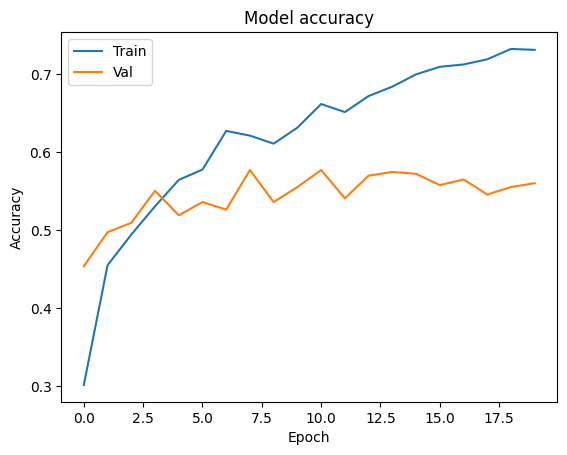

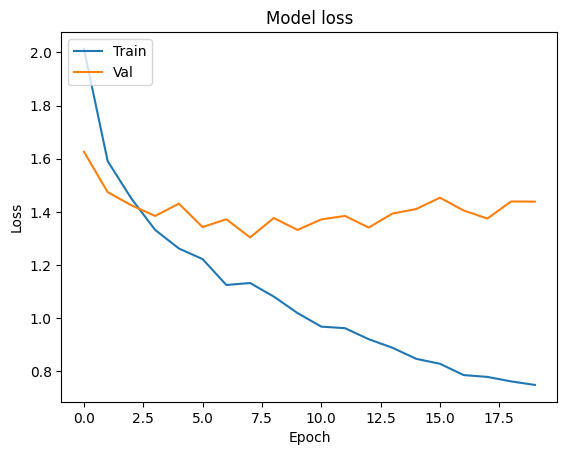

Lớp base_model: Đây là một mô hình cơ sở (base model), mô hình mobilenetV2. Lớp này được sử dụng để trích xuất đặc trưng từ ảnh đầu vào.

Lớp GlobalAveragePooling2D(): Lớp này thực hiện phép toàn tử "global average pooling" trên đầu ra của base_model. Nó tính trung bình các giá trị trong mỗi feature map của base_model, thu gọn đầu ra thành một vectơ có số chiều cố định.

Lớp Dense(512, activation='relu'): Lớp fully connected (hoàn toàn kết nối) với 512 đơn vị đầu ra và hàm kích hoạt ReLU. Lớp này thực hiện một phép biến đổi phi tuyến tính trên đầu ra của lớp trước đó.

Lớp Dropout(0.5): Lớp dropout với tỷ lệ dropout là 0.5. Lớp này giúp ngăn chặn việc quá khớp (overfitting) bằng cách ngẫu nhiên loại bỏ một phần các đơn vị đầu ra trong quá trình huấn luyện.

Lớp Dense(len(flower_names), activation='softmax'): Lớp fully connected với số đơn vị đầu ra bằng số lượng tên loại hoa trong bộ dữ liệu (biến flower_names). Hàm kích hoạt softmax được sử dụng để đưa ra dự đoán xác suất cho từng lớp loại hoa.